<a href="https://colab.research.google.com/github/alexandruxtrifon/Twitter-Sentiment-Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
df.columns = ["tweet_id", "entity", "sentiment", "tweet"]
df.head()

,tweet_id,entity,sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   73995 non-null  int64 
 1   entity     73995 non-null  object
 2   sentiment  73995 non-null  object
 3   tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [16]:
df["tweet"].drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   73995 non-null  int64 
 1   entity     73995 non-null  object
 2   sentiment  73995 non-null  object
 3   tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [19]:
# q1: sunt datele de antrenare distribuite in mod egal intre clase?
classes = df["sentiment"].unique()
classes

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

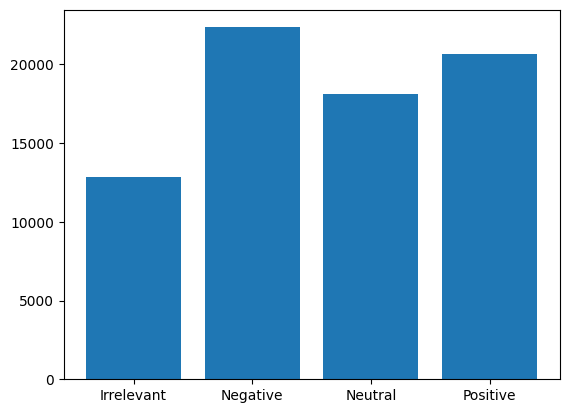

In [23]:
class_counts = df.groupby("sentiment").count()

_ = plt.figure()
plt.bar(class_counts.index, class_counts["tweet"])
plt.show()

In [26]:
# q2: remove tweet outliers
tweet_length = []
for tweet in df["tweet"].values:
  w = tweet.split(" ")
  n_words = len(w)
  tweet_length.append(n_words)


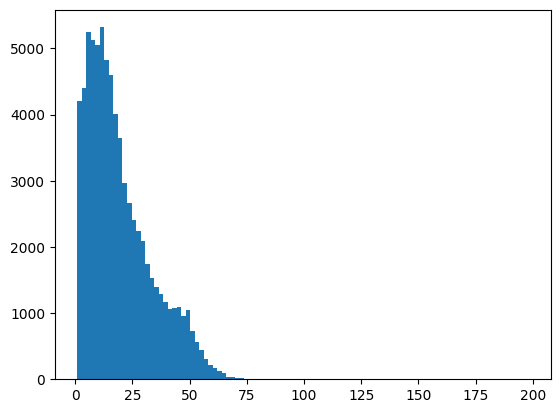

In [30]:
_ = plt.figure()
plt.hist(tweet_length, bins=100)
plt.show()

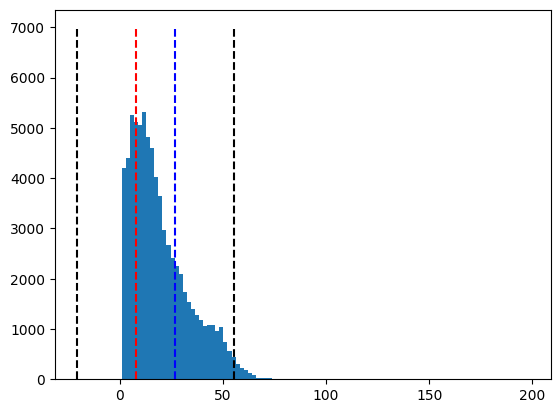

In [36]:
q1 = np.quantile(tweet_length, 0.25)
q3 = np.quantile(tweet_length, 0.75)
iqr = q3 - q1
min_len = q1 - 1.5 * iqr
max_len = q3 + 1.5 * iqr

_ = plt.figure()
plt.hist(tweet_length, bins=100)
plt.vlines(min_len, 0, 7000, linestyles="--", color="k")
plt.vlines(max_len, 0, 7000, linestyles="--", color="k")
plt.vlines(q1, 0, 7000, linestyles="--", color="r")
plt.vlines(q3, 0, 7000, linestyles="--", color="b")
plt.show()

In [38]:
q1, q3

(8.0, 27.0)

In [39]:
min_len, max_len

(-20.5, 55.5)

In [43]:
q1 = np.quantile(tweet_length, 0.1)
q3 = np.quantile(tweet_length, 0.95)
q1, q3

(4.0, 49.0)

In [45]:
df["tweet_length"] = df["tweet"].apply(lambda x: len(x.split(" ")))
df.head()

,tweet_id,entity,sentiment,tweet,tweet_length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10


In [46]:
q1 = np.quantile(df["tweet_length"], 0.1)

print(f"Tweets: {len(df)}")
df = df[df["tweet_length"] > q1]
print(f"Tweets: {len(df)}")

Tweets: 73995
Tweets: 65395


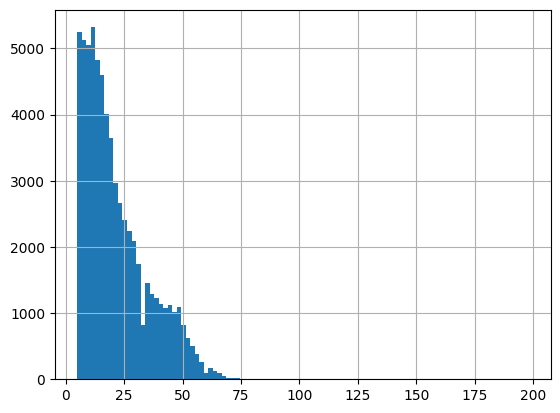

In [49]:
df["tweet_length"].hist(bins = 100)
plt.show()

In [50]:
df["tweet_length"] = df["tweet"].apply(lambda x: x.lower())
df.head()

,tweet_id,entity,sentiment,tweet,tweet_length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
